In [1]:
import numpy as np
import pandas as pd

In [7]:
sufix = '-v3'
RAW_PATH = '../examples/logs/phylo%s/DiseasePhyloReports.tsv'%sufix
raw_data = pd.read_csv(RAW_PATH, sep = "\t|,", engine='python')
infectious_data = raw_data[raw_data['diseaseStatus'] == 'Infectious'].reset_index()
name = []
for seq in infectious_data['diseaseSeq']:
    name.append(seq.split('.')[-1])
dm = np.load('dm-v3.npy')

In [8]:
df = pd.DataFrame(data = dm, index=name, columns=name)

In [9]:
def neighbor_joining(df):
    # Convert the DataFrame to a numpy matrix
    dist_matrix = df.to_numpy()
    taxa = list(df.index)
    tree = {}

    while len(taxa) > 2:
        n = len(taxa)
        Q_matrix = np.zeros((n, n))
        print(n)
        
        # Compute the Q matrix
        sumi = [np.sum(dist_matrix[i]) for i in range(n)]
        
        for i in range(n):
            for j in range(n):
                if i != j:
                    Q_matrix[i][j] = (n - 2) * dist_matrix[i][j] - sumi[i] - sumi[j]
        
        # Find the pair with the smallest Q value
        min_i, min_j = np.unravel_index(np.argmin(Q_matrix), Q_matrix.shape)
        
        # Compute the distance to the new node
        new_dist = (dist_matrix[min_i][min_j] +  (sumi[min_i] - sumi[min_j]) / (n - 2)) / 2
        
        # Update the tree
        new_node = taxa[min_i] + '.' + taxa[min_j]
        tree[new_node] = {taxa[min_i]: new_dist,
                          taxa[min_j]: dist_matrix[min_i][min_j] - new_dist}
        
        # Update the distance matrix
        new_row = [(dist_matrix[min_i][k] + dist_matrix[min_j][k] - dist_matrix[min_i][min_j]) / 2 for k in range(n) if k != min_i and k != min_j]
        new_dist_matrix = np.delete(dist_matrix, [min_i, min_j], axis=0)
        new_dist_matrix = np.delete(new_dist_matrix, [min_i, min_j], axis=1)
        new_dist_matrix = np.vstack((new_dist_matrix, new_row))
        new_row.append(0)
        new_dist_matrix = np.column_stack((new_dist_matrix, new_row))
        
        # Update the taxa list
        new_taxa = taxa[:]
        new_taxa.remove(taxa[min_i])
        new_taxa.remove(taxa[min_j])
        new_taxa.append(new_node)
        
        # Update the distance matrix and taxa list
        dist_matrix = new_dist_matrix
        taxa = new_taxa
        
    # Connect the final two nodes
    tree[taxa[1]][taxa[0]] = dist_matrix[0, 1]
    
    return tree

In [10]:
# Run the neighbor joining algorithm
result_tree = neighbor_joining(df)
np.save('treedict-v3.npy',result_tree)

4446
4445
4444
4443
4442
4441
4440
4439
4438
4437
4436
4435
4434
4433
4432
4431
4430
4429
4428
4427
4426
4425
4424
4423
4422
4421
4420
4419
4418
4417
4416
4415
4414
4413
4412
4411
4410
4409
4408
4407
4406
4405
4404
4403
4402
4401
4400
4399
4398
4397
4396
4395
4394
4393
4392
4391
4390
4389
4388
4387
4386
4385
4384
4383
4382
4381
4380
4379
4378
4377
4376
4375
4374
4373
4372
4371
4370
4369
4368
4367
4366
4365
4364
4363
4362
4361
4360
4359
4358
4357
4356
4355
4354
4353
4352
4351
4350
4349
4348
4347
4346
4345
4344
4343
4342
4341
4340
4339
4338
4337
4336
4335
4334
4333
4332
4331
4330
4329
4328
4327
4326
4325
4324
4323
4322
4321
4320
4319
4318
4317
4316
4315
4314
4313
4312
4311
4310
4309
4308
4307
4306
4305
4304
4303
4302
4301
4300
4299
4298
4297
4296
4295
4294
4293
4292
4291
4290
4289
4288
4287
4286
4285
4284
4283
4282
4281
4280
4279
4278
4277
4276
4275
4274
4273
4272
4271
4270
4269
4268
4267
4266
4265
4264
4263
4262
4261
4260
4259
4258
4257
4256
4255
4254
4253
4252
4251
4250
4249
4248
4247


2807
2806
2805
2804
2803
2802
2801
2800
2799
2798
2797
2796
2795
2794
2793
2792
2791
2790
2789
2788
2787
2786
2785
2784
2783
2782
2781
2780
2779
2778
2777
2776
2775
2774
2773
2772
2771
2770
2769
2768
2767
2766
2765
2764
2763
2762
2761
2760
2759
2758
2757
2756
2755
2754
2753
2752
2751
2750
2749
2748
2747
2746
2745
2744
2743
2742
2741
2740
2739
2738
2737
2736
2735
2734
2733
2732
2731
2730
2729
2728
2727
2726
2725
2724
2723
2722
2721
2720
2719
2718
2717
2716
2715
2714
2713
2712
2711
2710
2709
2708
2707
2706
2705
2704
2703
2702
2701
2700
2699
2698
2697
2696
2695
2694
2693
2692
2691
2690
2689
2688
2687
2686
2685
2684
2683
2682
2681
2680
2679
2678
2677
2676
2675
2674
2673
2672
2671
2670
2669
2668
2667
2666
2665
2664
2663
2662
2661
2660
2659
2658
2657
2656
2655
2654
2653
2652
2651
2650
2649
2648
2647
2646
2645
2644
2643
2642
2641
2640
2639
2638
2637
2636
2635
2634
2633
2632
2631
2630
2629
2628
2627
2626
2625
2624
2623
2622
2621
2620
2619
2618
2617
2616
2615
2614
2613
2612
2611
2610
2609
2608


1168
1167
1166
1165
1164
1163
1162
1161
1160
1159
1158
1157
1156
1155
1154
1153
1152
1151
1150
1149
1148
1147
1146
1145
1144
1143
1142
1141
1140
1139
1138
1137
1136
1135
1134
1133
1132
1131
1130
1129
1128
1127
1126
1125
1124
1123
1122
1121
1120
1119
1118
1117
1116
1115
1114
1113
1112
1111
1110
1109
1108
1107
1106
1105
1104
1103
1102
1101
1100
1099
1098
1097
1096
1095
1094
1093
1092
1091
1090
1089
1088
1087
1086
1085
1084
1083
1082
1081
1080
1079
1078
1077
1076
1075
1074
1073
1072
1071
1070
1069
1068
1067
1066
1065
1064
1063
1062
1061
1060
1059
1058
1057
1056
1055
1054
1053
1052
1051
1050
1049
1048
1047
1046
1045
1044
1043
1042
1041
1040
1039
1038
1037
1036
1035
1034
1033
1032
1031
1030
1029
1028
1027
1026
1025
1024
1023
1022
1021
1020
1019
1018
1017
1016
1015
1014
1013
1012
1011
1010
1009
1008
1007
1006
1005
1004
1003
1002
1001
1000
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961

In [11]:
# Load tree
tree_dict = np.load('treedict-v3.npy',allow_pickle='TRUE').item()

In [36]:
# Revise keys and the order
new_tree_dict = {}
for pnode in tree_dict.keys():
    new_pnode = pnode.replace('-1','-1.').replace('-2','-2.')[:-1]
    new_tree_dict[new_pnode] = {}
    cnodes = []
    for cnode in tree_dict[pnode].keys():
        new_cnode = cnode.replace('-1','-1.').replace('-2','-2.')[:-1]
        cnodes.append([tree_dict[pnode][cnode],new_cnode])
    cnodes.sort()
    for val,node in cnodes:
        new_tree_dict[new_pnode][node] = val
new_tree_dict

{'2295-1.2636-1': {'2295-1': 0.04096441012500646,
  '2636-1': 0.04236892320832691},
 '424-1.287-1': {'424-1': 0.04482545862402794, '287-1': 0.046083632285063},
 '1112-1.2198-1': {'1112-1': 0.04951155522132774,
  '2198-1': 0.05048844477867224},
 '945-1.1391-1': {'945-1': 0.049465047679947104,
  '1391-1': 0.050534952320052874},
 '1645-1.1630-1': {'1645-1': 0.04089470351031882,
  '1630-1': 0.04243862982301455},
 '1966-1.1912-1': {'1966-1': 0.062284603146847015,
  '1912-1': 0.06271539685315299},
 '576-1.1364-1': {'576-1': 0.044690373797424215,
  '1364-1': 0.046218717111666724},
 '1786-1.4561-1': {'1786-1': 0.04467793737143448,
  '4561-1': 0.04623115353765646},
 '853-1.724-1': {'853-1': 0.06225874491203619, '724-1': 0.06274125508796381},
 '1594-1.963-1': {'1594-1': 0.04466022125191734, '963-1': 0.0462488696571736},
 '375-1.1422-1': {'375-1': 0.040803710702250966,
  '1422-1': 0.042529622631082405},
 '596-1.1340-1': {'596-1': 0.049274865360252454,
  '1340-1': 0.050725134639747524},
 '1245-1.7

In [12]:
tree_dict

{'2295-12636-1': {'2295-1': 0.04096441012500646,
  '2636-1': 0.04236892320832691},
 '424-1287-1': {'424-1': 0.04482545862402794, '287-1': 0.046083632285063},
 '1112-12198-1': {'1112-1': 0.04951155522132774,
  '2198-1': 0.05048844477867224},
 '945-11391-1': {'945-1': 0.049465047679947104,
  '1391-1': 0.050534952320052874},
 '1645-11630-1': {'1645-1': 0.04089470351031882,
  '1630-1': 0.04243862982301455},
 '1966-11912-1': {'1966-1': 0.062284603146847015,
  '1912-1': 0.06271539685315299},
 '576-11364-1': {'576-1': 0.044690373797424215,
  '1364-1': 0.046218717111666724},
 '1786-14561-1': {'1786-1': 0.04467793737143448,
  '4561-1': 0.04623115353765646},
 '853-1724-1': {'853-1': 0.06225874491203619, '724-1': 0.06274125508796381},
 '1594-1963-1': {'1594-1': 0.04466022125191734, '963-1': 0.0462488696571736},
 '375-11422-1': {'375-1': 0.040803710702250966,
  '1422-1': 0.042529622631082405},
 '596-11340-1': {'596-1': 0.049274865360252454,
  '1340-1': 0.050725134639747524},
 '1245-1709-1': {'1245

In [18]:
root = list(tree_dict.keys())[-1]

In [19]:
from Bio import Phylo
from Bio.Phylo import PhyloXML
from Bio.Phylo.Newick import Tree, Clade

def build_clade(node, tree_dict):
    if node not in tree_dict:
        return Clade(name=node)
    
    clade = Clade()
    for child, distance in tree_dict[node].items():
        child_clade = build_clade(child, tree_dict)
        child_clade.branch_length = distance
        clade.clades.append(child_clade)
    
    return clade

root_clade = build_clade(root, tree_dict)
tree = Tree(root=root_clade)

In [20]:
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)
Phylo.write([phyloxml_tree], 'tree.xml', 'phyloxml')

1

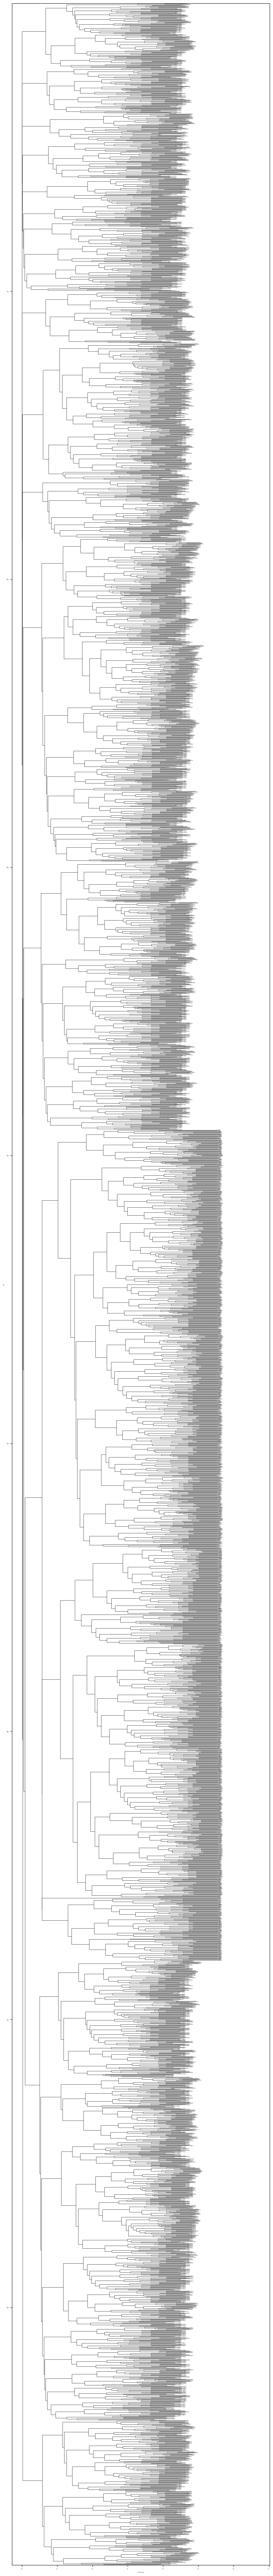

In [32]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['font.size'] = 2
fig,ax = plt.subplots(1,figsize=(10, 100))
Phylo.draw(tree, axes = ax, do_show=False)
plt.savefig("phylo-v3.pdf", format="pdf",bbox_inches="tight")

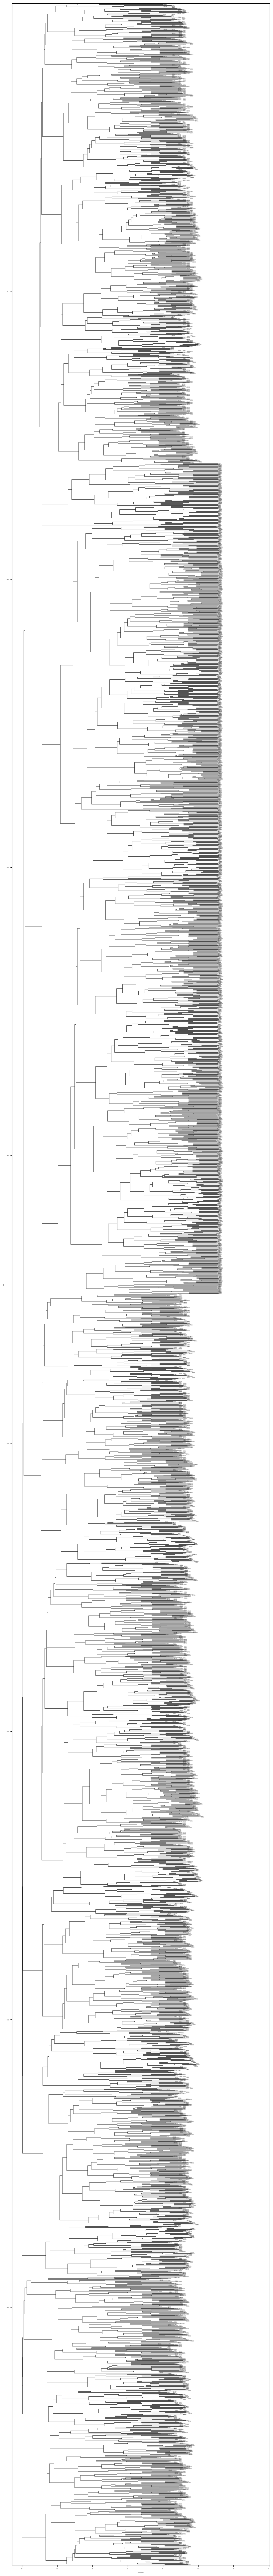

In [37]:
root_clade = build_clade(list(new_tree_dict.keys())[-1], new_tree_dict)
tree = Tree(root=root_clade)
phyloxml_tree = PhyloXML.Phylogeny.from_tree(tree)
Phylo.write([phyloxml_tree], 'tree-sorted.xml', 'phyloxml')
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['font.size'] = 2
fig,ax = plt.subplots(1,figsize=(10, 100))
Phylo.draw(tree, axes = ax, do_show=False)
plt.savefig("phylo-v3-sorted.pdf", format="pdf",bbox_inches="tight")